## SMS SPAM FILTER FRAMEWORK | MACHINE LEARNING | TEXT ANALYTICS

--------------------------------------------------------------------------------------------------------------------------------

**Sumitted by**

D22010 - Aswin Kumar I S

D22024 - Laxmi Panchal 

D22027 - Maheshkumar N

**Problem Statement**: Developing an SMS Spam Filter using Natural Language Processing and Machine Learning Algorithms

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 
This corpus has been collected from free or free for research sources at the Web:

A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/

A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available at http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf

A subset of 3,375 SMS ham messages of the NUS SMS Corpus (NSC), which is a corpus of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The NUS SMS Corpus is avalaible at: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/

The amount of 1,002 SMS ham messages and 322 spam messages extracted from the SMS Spam Corpus v.0.1 Big created by José María Gómez Hidalgo and public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/


In [572]:
#import required Libraries
import pandas as pd
import string
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

### 1) READING THE DATA

In [584]:
# Loading and reading the dataset
doc = pd.read_csv(r'C:\Users\aswin\Downloads\smsspamcollection\SMSSpamCollection.csv',header=None)
doc.columns = ['Labels','SMS']

In [585]:
# Checking for the target class imbalance
doc.Labels.value_counts()

ham     4827
spam     747
Name: Labels, dtype: int64

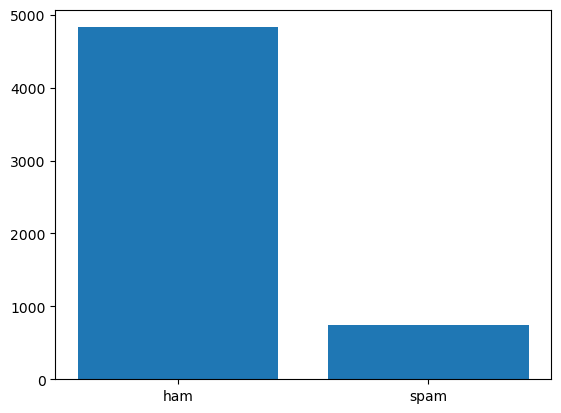

In [873]:
plt.bar(x= doc.Labels.unique(),height=doc.Labels.value_counts())
plt.show()

We observe that the target class is highly imbalanced (inclined towards ham) in the dataset.

### 2) TEXT PRE-PROCESSING

#### i) REMOVING EXTRA WHITESPACES BETWEEN WORDS

In [586]:
for i in range(len(doc.SMS)):
    doc.SMS[i] = doc.SMS[i].replace("  ", " ").strip()
doc.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


To avoid the confusion of extra white spaces being considered as a character we removed the extra whitespaces.

#### ii) REMOVING THE STOPWORDS FROM THE MESSAGES

In [587]:
# importing stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
for i in range(len(doc.SMS)):
    doc.SMS[i] = " ".join([w for w in doc.SMS[i].split() if w not in stop_words])

In [588]:
doc.head()

,Labels,SMS
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


We've removed the stopwords since they don't make any add value or meaning to analysing whether spam or not spam.

#### iii) REMOVING REDUNDANCY OF WORDS USING LEMMATIZATION

In [548]:
# importing wordnet and omw
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [589]:
# import wordnetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for i in range(len(doc.SMS)):
    words = nltk.word_tokenize(doc.SMS[i])
    doc.SMS[i] = " ".join([lemmatizer.lemmatize(word, pos='v') for word in words])

Why not stemming? Stemming chops off the word irrespective of the context, whereas the latter is context-dependent.

In [687]:
# Taking a copy of the documents
engineered = doc.copy()

### 3) DATA EXPLORATION

#### USING WORD CLOUD MODEL

In [550]:
ham=""
spam=""

for i in range(doc.shape[0]):
    if doc.Labels[i] =='ham':
        ham=ham+doc.SMS[i]
    else:
        spam=spam+doc.SMS[i]

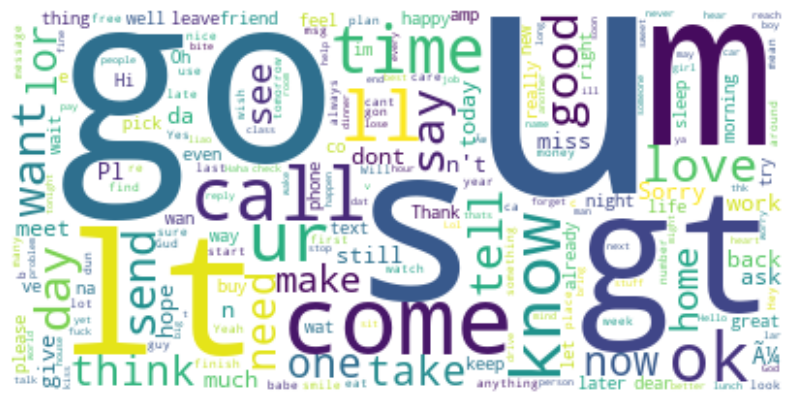

In [551]:
#Wordcloud for positive tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

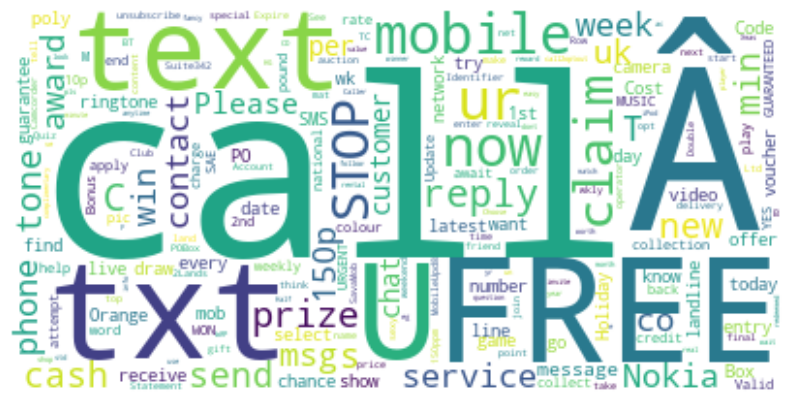

In [552]:
#Wordcloud for positive tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Observation : 

> We observe that call, come, time and think,etc are the most frequently occuring words in the ham messages.

> We observe that call, free,txtu,etc are the most frquently occuring words in spam messages.


#### Frequency value counts of all the unique words

In [553]:
value_counts_ham = {}
for i in ham.split():
    if i not in value_counts_ham:
        value_counts_ham[i]=1
    else:
        value_counts_ham[i]+=1

value_counts_spam = {}        
for j in spam.split():
    if j not in value_counts_spam:
        value_counts_spam[j]=1
    else:
        value_counts_spam[j]+=1        

We created 2 dictionaries to take into account of the frequency of all the unique words in ham and spam messages. This was done so that this can be used to engineer new features.

### 4) VECTORIZATION

#### a) VECTORIZATION USING TERM FREQUENCY MATRIX

In [590]:
#using count vectorizer to create a document-term matrix
cv=CountVectorizer()

# Training and transforming the data to an array
X=cv.fit_transform(doc.SMS).toarray()

# Extracting the words 
names=cv.get_feature_names()

#Converting the document-term matrix to a dataframe
tf_df=pd.DataFrame(X,columns=names)

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### b) VECTORIZATION USING  TERM FREQUENCY-INVERSE DOCUMENT MATRIX

In [591]:
# Importing the TfidVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating the TfidVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Training and transforming the data 
tfidf_vectors = tfidf_vectorizer.fit_transform(doc.SMS)

# Getting the name of the words
names = tfidf_vectorizer.get_feature_names()

# Creting an array of the vectors
tfidf_vectors = tfidf_vectors.toarray()

# Creating the tfidf dataframe
tfidf_df = pd.DataFrame(tfidf_vectors, columns=names)

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### c) VECTORIZATION USING GOOGLE'S WORD-TO-VEC MODEL

Here each documented is represented as a vector of size 300.

In [ ]:
# import keyedvectors from gensim library
from gensim.models import KeyedVectors

# Loading the embeddings
embeddings = KeyedVectors.load_word2vec_format(r'C:\Users\aswin\Downloads\./GoogleNews-vectors-negative300.bin', binary = True)

# Defining a function that return the vectorized equivalent of the word
def vec(a):
    return(embeddings[a])

# Converting each document into a vector
word_embeddings_list = {}

# Converting each document to a vector of length 300 (document to vector)
for doc in doc.SMS:
    vec_list = []
    for word in doc.split():
        if word in embeddings.index_to_key:
            vec_list.append(vec(word))
    word_embeddings_list[doc] = np.sum(np.array(vec_list),axis=0)

In [592]:
# Creating a dataframe with each row corresponds to an SMS 
doc2vec_df = pd.DataFrame.transpose(pd.DataFrame(word_embeddings_list))

#### d) GENERATE HEURISTIC FEATURES

#### Phone Number

In [689]:
import re
engineered["Phone Number Check"] = np.nan

In [692]:
# Creating a binary variable which describes the presence of phone number
for i in range(len(engineered)):
    phone_num = re.findall(r'\d{11}', engineered.iloc[i,1])
    if len(phone_num)>0:
        engineered.iloc[i,2] = 1
    else:
        engineered.iloc[i,2] = 0

In [693]:
engineered["Phone Number Check"] = engineered["Phone Number Check"].astype(int)

In [695]:
engineered["Phone Number Check"].value_counts()

0    5173
1     401
Name: Phone Number Check, dtype: int64

We've mapped spam with 1 and ham with 0 corresponding to the target variable.

#### $ Sign

In [874]:
# Creating a binary variable which describes the presence of '$' sign. We assume that most likely spam messages include a '$' sign in it

In [696]:
engineered["$ sign check"] = np.nan

In [697]:
for i in range(len(engineered)):
    sign = re.findall(r'\$', engineered.iloc[i,1])
    if len(sign)>0:
        engineered.iloc[i,3] = 1
    else:
        engineered.iloc[i,3] = 0

In [698]:
engineered["$ sign check"] = engineered["$ sign check"].astype(int)

In [699]:
engineered.head()

,Labels,SMS,Phone Number Check,$ sign check
0,ham,"Go jurong point , crazy .. Available bugis n g...",0,0
1,ham,Ok lar ... Joking wif u oni ...,0,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,1,0
3,ham,U dun say early hor ... U c already say ...,0,0
4,ham,"Nah I think go usf , live around though",0,0


In [700]:
engineered["$ sign check"].value_counts()

0    5556
1      18
Name: $ sign check, dtype: int64

#### Capital letter word

Mostly spam messages occur with a combination of upper case words. We create a binary predictor which maps a particular document
to 1 if it has more than 3 upper-case words and 0 otherwise.

In [702]:
engineered["Capital letter word check"] = np.nan

In [703]:
pattern = r'\b[A-Z]+\b'
for i in range(len(engineered)):
    cap = len(re.findall(pattern, engineered.iloc[i,1]))
    if cap > 3:
        engineered.iloc[i,4] = 1 #spam
    else:
        engineered.iloc[i,4] = 0 #ham

In [704]:
engineered["Capital letter word check"] = engineered["Capital letter word check"].astype(int)

In [705]:
engineered

,Labels,SMS,Phone Number Check,$ sign check,Capital letter word check
0,ham,"Go jurong point , crazy .. Available bugis n g...",0,0,0
1,ham,Ok lar ... Joking wif u oni ...,0,0,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,1,0,1
3,ham,U dun say early hor ... U c already say ...,0,0,0
4,ham,"Nah I think go usf , live around though",0,0,0
...,...,...,...,...,...
5569,spam,This 2nd time try 2 contact u. U Â£750 Pound p...,1,0,0
5570,ham,Will Ã¼ b go esplanade fr home ?,0,0,0
5571,ham,"Pity , * mood that . So ... any suggestions ?",0,0,0
5572,ham,The guy bitch I act like i 'd interest buy som...,0,0,0


In [706]:
engineered["Capital letter word check"].value_counts()

0    5165
1     409
Name: Capital letter word check, dtype: int64

#### Spelling_Mistake Check

Usually the spam messages come along with mispelt words. Hence we create a continuos variable as a predictor that measures the proportion of mispelled words in a document.

In [709]:
#! pip install spellchecker
#! pip install pyspellchecker

In [714]:
# Importing spell checker
from spellchecker import SpellChecker
spell = SpellChecker(language='en')

In [715]:
engineered["SpellingMistake%Check"] = np.nan

In [718]:
for i in range(len(engineered)):
    misspelled_words = spell.unknown(engineered.iloc[i,1].split())
    prop =  len(misspelled_words) / len(engineered.iloc[i,1].split())
    engineered.iloc[i,5] = prop

#### Prop of Punctuations

Usually the spam messages come along with lot of punctuations. Hence we create a continuos variable as a predictor that measures the proportion of punctuations in a document.

In [720]:
engineered["Punctuation%Check"] = np.nan

In [721]:
for i in range(len(engineered)):
    punctuation = re.compile(r'[.,?!]')
    num_punctuation = len(punctuation.findall(engineered.iloc[i,1]))
    punct_prop = num_punctuation / len(engineered.iloc[i,1])
    engineered.iloc[i,6] = punct_prop

#### Subjectivity Score of Sentence

Creating a continuous feature based on the documents which measures the subjectivity score

> Subjectivity and fake messages can be related in that a subjective message is more likely to be considered as a fake message. A subjective message is one that is based on personal opinions, feelings, and beliefs, rather than facts or evidence. When a message lacks objectivity, it can be more easily manipulated or distorted to serve the interests of the sender, making it harder to distinguish between real and fake information.

In [723]:
#!pip install textblob

In [724]:
# Importing the TextBlob 
from textblob import TextBlob

In [725]:
engineered["Subjectivity Score"] = np.nan
#engineered.head()

In [726]:
for i in range(len(engineered)):
    blob = TextBlob(engineered.iloc[i,1])
    sub_score = blob.sentiment.subjectivity
    engineered.iloc[i,7] = sub_score

In [727]:
engineered.head()

,Labels,SMS,Phone Number Check,$ sign check,Capital letter word check,SpellingMistake%Check,Punctuation%Check,Subjectivity Score
0,ham,"Go jurong point , crazy .. Available bugis n g...",0,0,0,0.250000,0.094737,0.683333
1,ham,Ok lar ... Joking wif u oni ...,0,0,0,0.125000,0.193548,0.500000
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,1,0,1,0.281250,0.006667,0.550000
3,ham,U dun say early hor ... U c already say ...,0,0,0,0.181818,0.139535,0.300000
4,ham,"Nah I think go usf , live around though",0,0,0,0.111111,0.025641,0.500000


#### Sentiment Score using Vader

We're using vader library to measure the strength of sentiment. Exteme sentiments at either end are usually observed in spam messages.

In [729]:
#!pip install vaderSentiment

In [731]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [732]:
engineered["Sentiment Score"] = np.nan

In [733]:
for i in range(len(engineered)):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(engineered.iloc[i,1])
    sentiment_score = sentiment['compound']
    engineered.iloc[i,8] = sentiment_score

In [734]:
engineered.head()

,Labels,SMS,Phone Number Check,$ sign check,Capital letter word check,SpellingMistake%Check,Punctuation%Check,Subjectivity Score,Sentiment Score
0,ham,"Go jurong point , crazy .. Available bugis n g...",0,0,0,0.250000,0.094737,0.683333,0.4019
1,ham,Ok lar ... Joking wif u oni ...,0,0,0,0.125000,0.193548,0.500000,0.4767
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,1,0,1,0.281250,0.006667,0.550000,0.7964
3,ham,U dun say early hor ... U c already say ...,0,0,0,0.181818,0.139535,0.300000,0.0000
4,ham,"Nah I think go usf , live around though",0,0,0,0.111111,0.025641,0.500000,-0.1027


In [ ]:
#Mapping 1 and 0 to 'spam' and 'ham'

In [736]:
engineered['Labels'].replace({'spam':1,'ham':0},inplace=True)

In [738]:
X_eng=engineered.drop(["Labels","SMS"],axis=1)
y_eng = engineered["Labels"]

###  5) PERFORMING DIMENSIONALITY REDUCTION

#### PRINCIPAL COMPONENT ANALYSIS

#### i)  PCA ON TERM FREQUENCY MATRIX

In [861]:
# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(tf_df)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
principalDF = pd.DataFrame(data=principalcomponents)

# Subsetting the dataframe based on the selected no.of principal components
pca_tf_df = principalDF.iloc[:,:count]

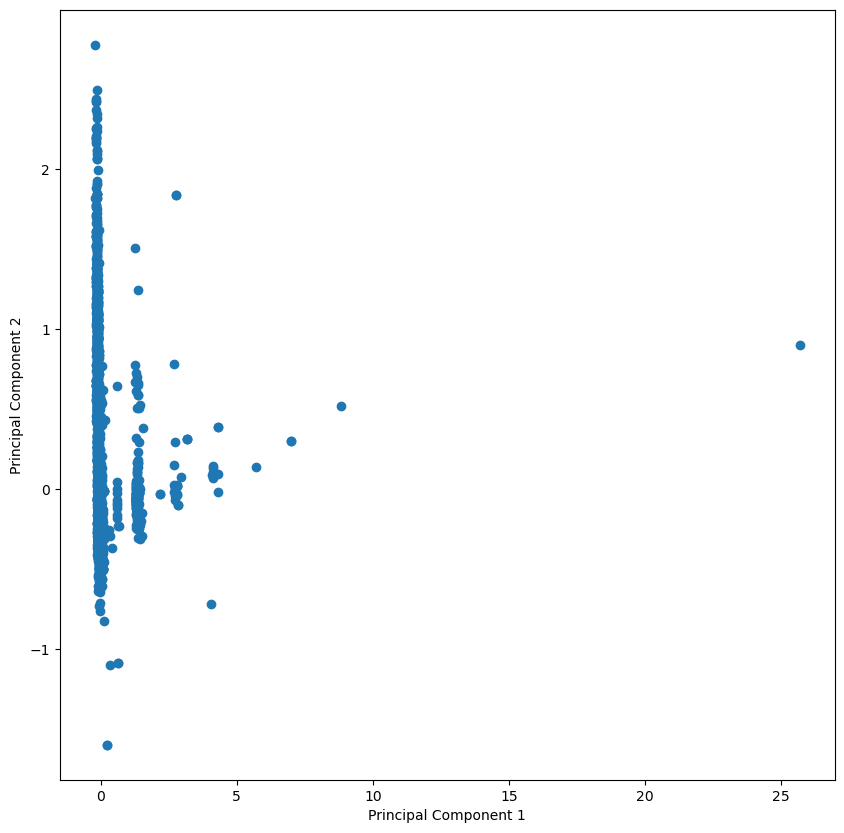

In [862]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10,10)) # Create custom size image

   
ax.scatter(principalDF[0], principalDF[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# # Add the word label over each dot in the scatter plot
# for i in principalDF.index:
#     ax.annotate(i, (principalDF.loc[i, 'PC1'], principalDF.loc[i, 'PC2']))
    
    
# # Print an arrow for each word
# for i in principalDF.index:
#     ax.arrow(0, 0, principalDF.loc[i, 'PC1'], principalDF.loc[i, 'PC2'], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

#### ii) Performing PCA on TF-IDF MATRIX

In [875]:
# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(tfidf_df)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break
print('Number of principal components explaining 95% of the variance is:',count)

# Creating the dataframe with the principal components
principalDF = pd.DataFrame(data=principalcomponents)

# Subsetting the dataframe based on the selected no.of principal components
pca_tf_idf = principalDF.iloc[:,:count]

Number of principal components explaining 95% of the variance is: 2591


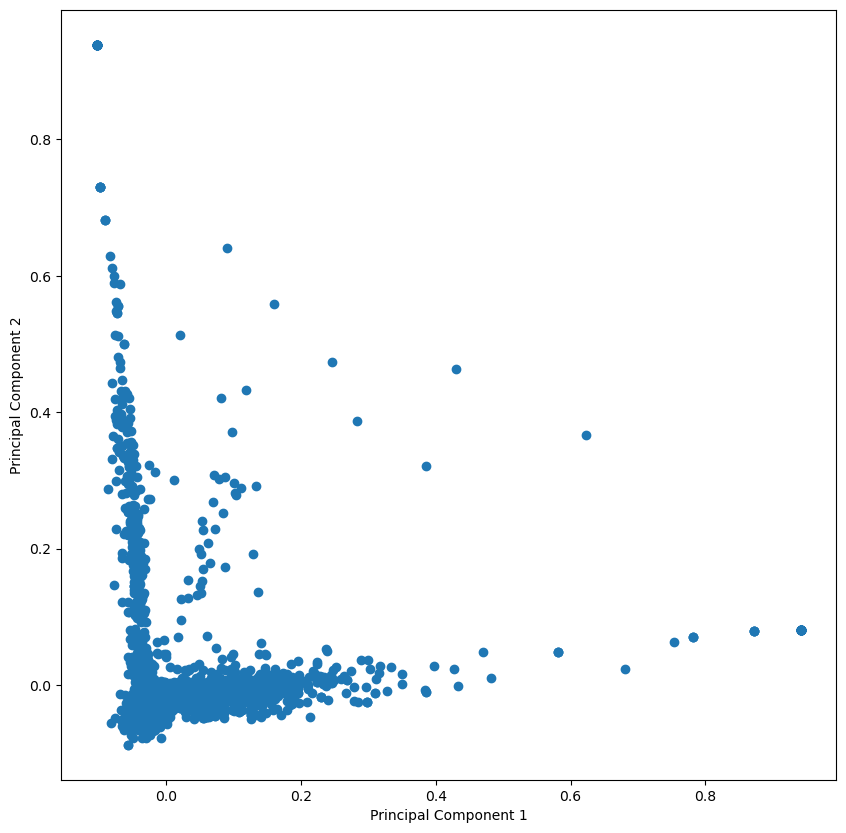

In [864]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10,10)) # Create custom size image

   
ax.scatter(principalDF[0], principalDF[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# # Add the word label over each dot in the scatter plot
# for i in principalDF.index:
#     ax.annotate(i, (principalDF.loc[i, 'PC1'], principalDF.loc[i, 'PC2']))
    
    
# # Print an arrow for each word
# for i in principalDF.index:
#     ax.arrow(0, 0, principalDF.loc[i, 'PC1'], principalDF.loc[i, 'PC2'], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

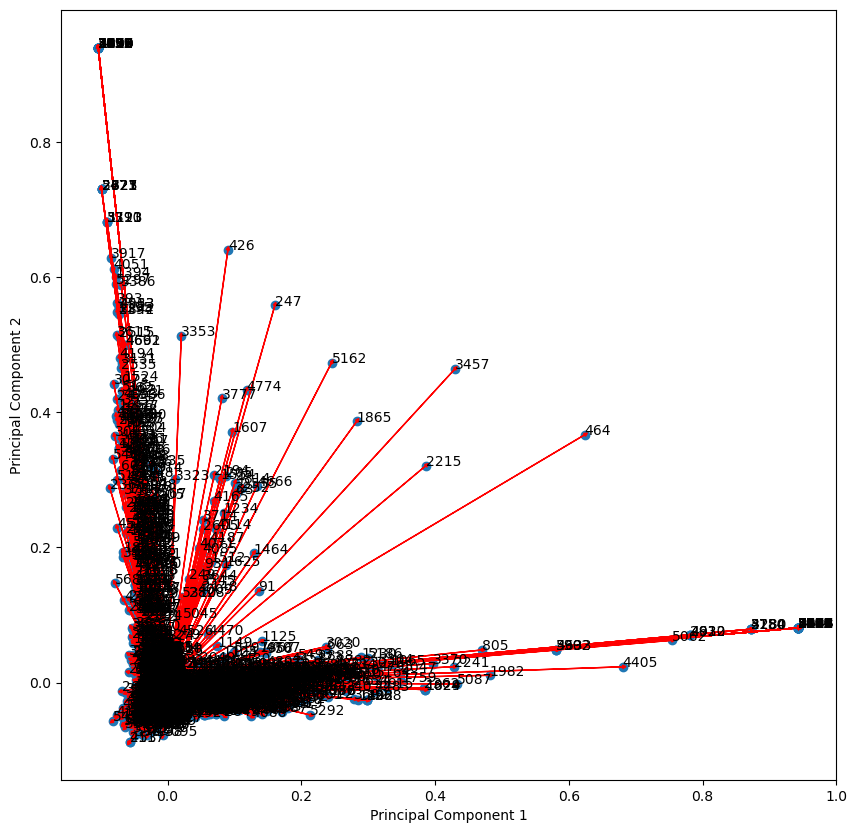

In [866]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principalDF[0], principalDF[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# Add the word label over each dot in the scatter plot
for i in principalDF.index:
    ax.annotate(i, (principalDF.loc[i, 0], principalDF.loc[i, 1]))
    
    
# Print an arrow for each word
for i in principalDF.index:
    ax.arrow(0, 0, principalDF.loc[i, 0], principalDF.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

In [865]:
tfidf_df1 = tfidf_df.copy()
#Remove terms that is contained in less than 1% of the documents
for col in list(tfidf_df):
    prop=tfidf_df[col].sum()/tfidf_df.shape[0]
    if prop*100 <1:
        tfidf_df1 = tfidf_df1.drop([col],axis=1)

#### iii) Performing PCA on DOC2VEC MATRIX

In [876]:
# # Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(doc2vec_df)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break
print('Number of principal components explaining 95% of the variance is:',count)

# Creating the dataframe with the principal components
principalDF = pd.DataFrame(data=principalcomponents,index=doc2vec_df.index)

# Subsetting the dataframe based on the selected no.of principal components
pca_doc2vec_df = principalDF.iloc[:,:count]

Number of principal components explaining 95% of the variance is: 180


C:\Users\aswin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


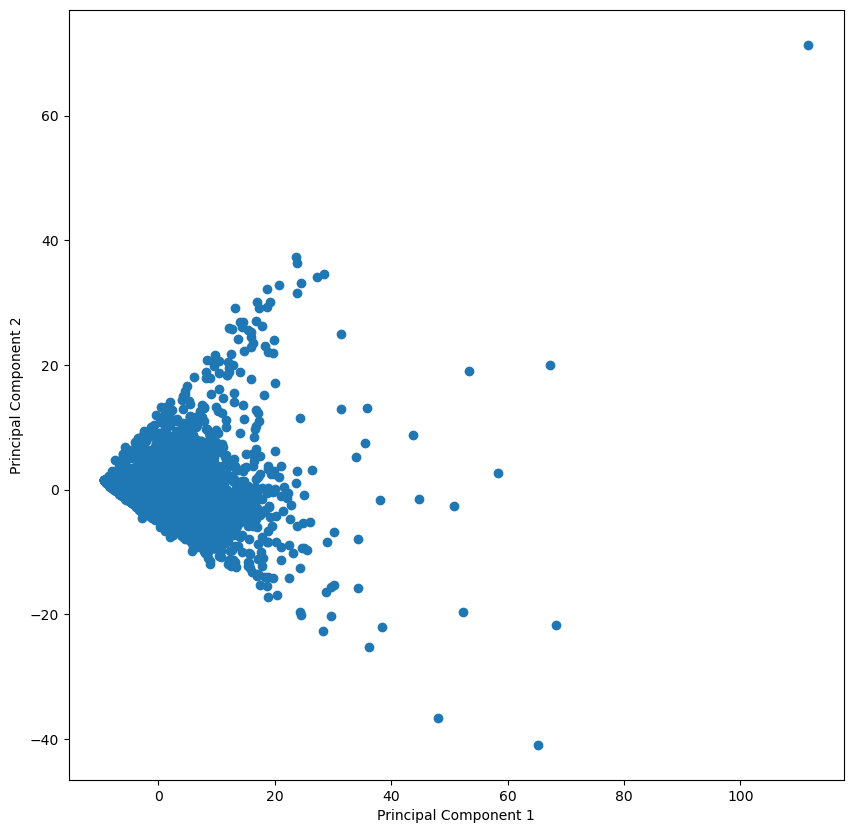

In [761]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10,10)) # Create custom size image

   
ax.scatter(principalDF[0], principalDF[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# # Add the word label over each dot in the scatter plot
# for i in principalDF.index:
#     ax.annotate(i, (principalDF.loc[i, 'PC1'], principalDF.loc[i, 'PC2']))
    
    
# # Print an arrow for each word
# for i in principalDF.index:
#     ax.arrow(0, 0, principalDF.loc[i, 'PC1'], principalDF.loc[i, 'PC2'], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

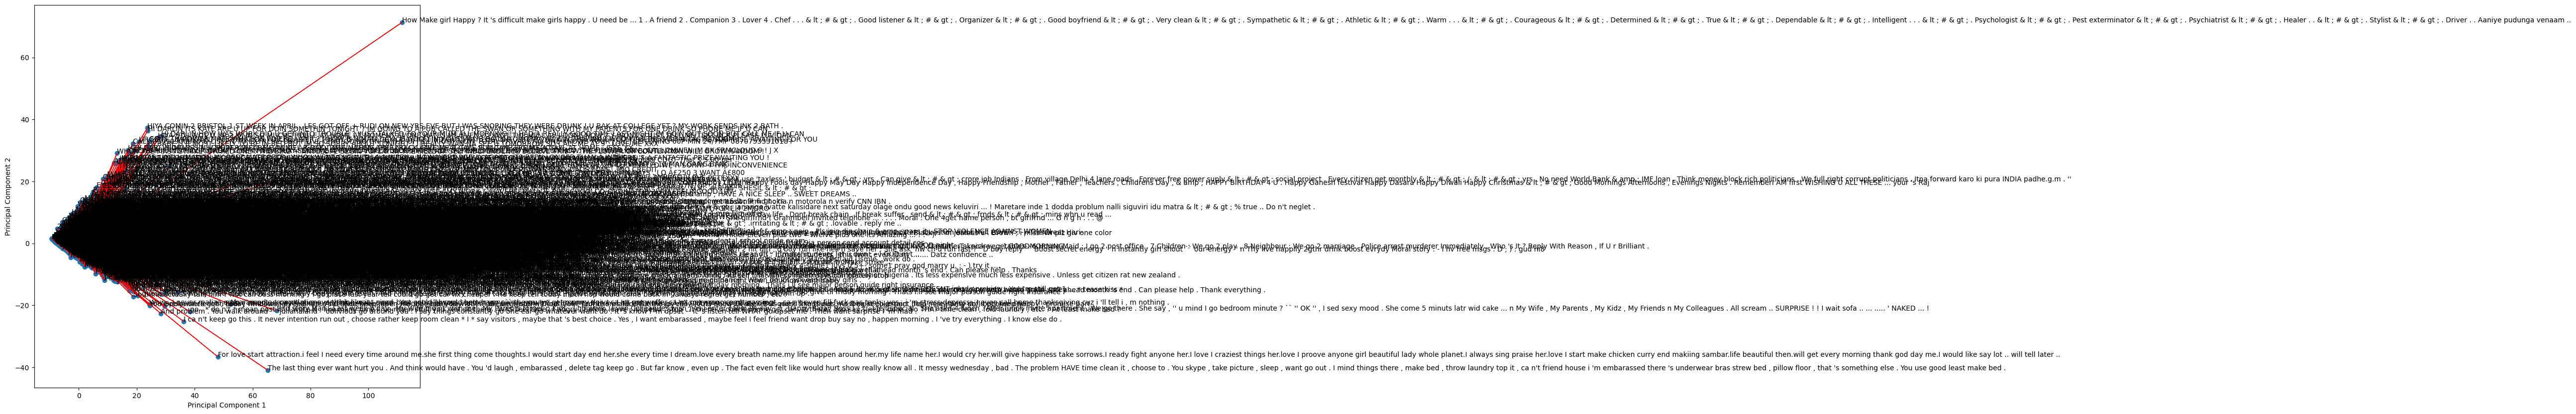

In [868]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

   
ax.scatter(principalDF[0], principalDF[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# Add the word label over each dot in the scatter plot
for i in principalDF.index:
    ax.annotate(i, (principalDF.loc[i, 0], principalDF.loc[i, 1]))
    
    
# Print an arrow for each word
for i in principalDF.index:
    ax.arrow(0, 0, principalDF.loc[i, 0], principalDF.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
plt.show()

In [595]:
pca_doc2vec_df.shape

(5156, 180)

#### iv) HEURISTIC APPROACH p% TO THE DOCUMENT TERM FREQUENCY MATRIX

In [462]:
# Creating a copy of the tf_df matrix
tf_df1 = tf_df.copy()

In [463]:
#Remove terms that is contained in less than 1% of the documents
for col in list(tf_df):
    prop=tf_df[col].sum()/tf_df.shape[0]
    if prop*100 <1:
        tf_df1=tf_df1.drop([col],axis=1)

In [464]:
tf_df1.shape

(5574, 200)

#### v) HEURISTIC APPROACH p% TO THE DOCUMENT TERM FREQUENCY MATRIX

In [465]:
# Creating a copy of the term-frequency inverse document frequency matrix
tfidf_df1 = tfidf_df.copy()
#Remove terms that is contained in less than 1% of the documents
for col in list(tfidf_df):
    prop=tfidf_df[col].sum()/tfidf_df.shape[0]
    if prop*100 <1:
        tfidf_df1 = tfidf_df1.drop([col],axis=1)

In [466]:
tfidf_df1.shape

(5574, 15)

### 6. SPAM FILTERS

### a) MODEL BUILDING FRAMEWORK

#### TRAIN VALIDATION TEST SPLIT

In [878]:
y = doc.Labels.map({'ham':0,'spam':1})

In [879]:
y1 = y.copy()

#### ESTIMATING MODEL PERFORMANCE ON TERM FREQUENCY MATRIX

In [880]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(tf_df, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

In [881]:
#import libraries for Model fittings
import sklearn.ensemble as ensemble #import ensemble for bagging
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,f1_score,precision_score #import Scoring metric
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#### Logistic Regression

In [882]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [883]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[781   1]
 [ 15  95]]


In [884]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.982063
F1_score,0.922330
Recall,0.863636
Precision,0.989583


#### Decision Tree Model

In [885]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [886]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[775   7]
 [ 45  65]]


In [887]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.941704
F1_score,0.714286
Recall,0.590909
Precision,0.902778


#### Bagged Decision Tree Model

In [888]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [889]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[775   7]
 [ 18  92]]


In [890]:
db1 = pd.DataFrame({'Bagged Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagged Decision Tree
Accuracy,0.971973
F1_score,0.880383
Recall,0.836364
Precision,0.929293


#### Random Forest Model

In [891]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [892]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[782   0]
 [ 17  93]]


In [893]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.980942
F1_score,0.916256
Recall,0.845455
Precision,1.000000


#### Adaboost Model

In [894]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid)

In [895]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[772  10]
 [ 17  93]]


In [896]:
db1 = pd.DataFrame({'AdaBoost Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,AdaBoost Tree
Accuracy,0.969731
F1_score,0.873239
Recall,0.845455
Precision,0.902913


#### ESTIMATING MODEL PERFORMANCE ON TERM FREQUENCY MATRIX OBTAINED AFTER DIMENSIONALITY REDUCTION - PCA

In [897]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(pca_tf_df, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [898]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [901]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[762   1]
 [ 19 110]]


In [902]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.977578
F1_score,0.916667
Recall,0.852713
Precision,0.990991


#### Decision Tree Model

In [903]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [904]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[743  20]
 [ 30  99]]


In [905]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.943946
F1_score,0.798387
Recall,0.767442
Precision,0.831933


#### Bagged Decision Tree Model

In [906]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [907]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[754   9]
 [ 37  92]]


In [908]:
db1 = pd.DataFrame({'Bagged Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagged Decision Tree
Accuracy,0.948430
F1_score,0.800000
Recall,0.713178
Precision,0.910891


#### Random Forest Model

In [909]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [910]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[762   1]
 [ 53  76]]


In [911]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.939462
F1_score,0.737864
Recall,0.589147
Precision,0.987013


#### Adaboost Model

In [912]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid) 

In [913]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[754   9]
 [ 16 113]]


In [914]:
db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,AdaBoost
Accuracy,0.971973
F1_score,0.900398
Recall,0.875969
Precision,0.926230


#### ESTIMATING MODEL PERFORMANCE ON TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY MATRIX

In [915]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [916]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [917]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[784   0]
 [ 49  59]]


In [918]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.945067
F1_score,0.706587
Recall,0.546296
Precision,1.000000


#### Decision Tree Model

In [919]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [920]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[770  14]
 [ 18  90]]


In [921]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.964126
F1_score,0.849057
Recall,0.833333
Precision,0.865385


#### Bagged Decision Tree Model

In [922]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred_bg = baggedModel.predict(X_valid)

In [923]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[770  14]
 [ 18  90]]


In [924]:
db1 = pd.DataFrame({'Bagged Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagged Decision Tree
Accuracy,0.964126
F1_score,0.849057
Recall,0.833333
Precision,0.865385


#### Random Forest Model

In [925]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [926]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[784   0]
 [ 19  89]]


In [927]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.978700
F1_score,0.903553
Recall,0.824074
Precision,1.000000


#### Adaboost Model

In [928]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid)

In [929]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[777   7]
 [ 17  91]]


In [930]:
db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,AdaBoost
Accuracy,0.973094
F1_score,0.883495
Recall,0.842593
Precision,0.928571


#### ESTIMATING MODEL PERFORMANCE ON TFIDF MATRIX OBTAINED AFTER DIMENSIONALITY REDUCTION - PCA

In [931]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(pca_tf_idf, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [932]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [933]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[789   0]
 [ 30  73]]


In [934]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.966368
F1_score,0.829545
Recall,0.708738
Precision,1.000000


#### Decision Tree Model

In [935]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [936]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[764  25]
 [ 18  85]]


In [937]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.951794
F1_score,0.798122
Recall,0.825243
Precision,0.772727


#### Bagged Decision Tree Model

In [938]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [939]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[783   6]
 [ 18  85]]


In [940]:
db1 = pd.DataFrame({'Bagged Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagged Decision Tree
Accuracy,0.973094
F1_score,0.876289
Recall,0.825243
Precision,0.934066


#### Random Forest Model

In [941]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [942]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[789   0]
 [ 50  53]]


In [943]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.943946
F1_score,0.679487
Recall,0.514563
Precision,1.000000


#### Adaboost Model

In [944]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid)

In [945]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[779  10]
 [ 12  91]]


,AdaBoost
Accuracy,0.975336
F1_score,0.892157
Recall,0.883495
Precision,0.900990


#### ESTIMATING MODEL PERFORMANCE ON DOC2VEC MODEL

In [946]:
# Resetting the index of the dataframe
doc2vec_df = doc2vec_df.reset_index()

# Creating the label column and filling it will null values
doc2vec_df['label'] = np.nan

# Mapping the label column from the original dataframe with the corresponding document in embeddings document
for i in range(len(doc.SMS)): 
    for j in range(len(doc2vec_df['index'])):
        if doc['SMS'][i]==doc2vec_df['index'][j]:
            doc2vec_df.iloc[j,301]=doc.Labels[j]

# Converting the label column into binary classes
doc2vec_df['label'].replace({'ham':0,'spam':1},inplace=True)

#### ESTIMATING MODEL PERFORMANCE ON DOC2VEC MATRIX

In [947]:
doc2vec_df.set_index('index',inplace=True)

In [948]:
y = doc2vec_df['label']

In [949]:
X = doc2vec_df.drop(columns='label')

In [950]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [951]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

C:\Users\aswin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [952]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[687  23]
 [107   8]]


In [953]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.842424
F1_score,0.109589
Recall,0.069565
Precision,0.258065


#### Decision Tree Model

In [954]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [955]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[614  96]
 [ 94  21]]


,Decision Tree
Accuracy,0.769697
F1_score,0.181034
Recall,0.182609
Precision,0.179487


#### Bagged Decision Tree Model

In [956]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [957]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'Bagged Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[696  14]
 [112   3]]


,Bagged Decision Tree
Accuracy,0.847273
F1_score,0.045455
Recall,0.026087
Precision,0.176471


#### Random Forest Model

In [958]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [959]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[707   3]
 [115   0]]


,Random Forest
Accuracy,0.85697
F1_score,0.00000
Recall,0.00000
Precision,0.00000


#### Adaboost Model

In [960]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model
pred = ada_boost.predict(X_valid) 

In [961]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[707   3]
 [115   0]]


,AdaBoost
Accuracy,0.85697
F1_score,0.00000
Recall,0.00000
Precision,0.00000


#### ESTIMATING MODEL PERFORMANCE ON WORD2VEC MATRIX AFTER DIMENSIONALITY REDUCTION USING PCA

In [1028]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(pca_doc2vec_df, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [1029]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [1030]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[713   1]
 [  4 107]]


In [1031]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.993939
F1_score,0.977169
Recall,0.963964
Precision,0.990741


#### Decision Tree Model

In [966]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [967]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[675  31]
 [ 43  76]]


,Decision Tree
Accuracy,0.910303
F1_score,0.672566
Recall,0.638655
Precision,0.710280


#### Bagged Decision Tree Model

In [968]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [969]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'Bagging Decision': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[695  11]
 [ 56  63]]


,Bagging Decision
Accuracy,0.918788
F1_score,0.652850
Recall,0.529412
Precision,0.851351


#### Random Forest Model

In [970]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred = rf.predict(X_valid)

In [971]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[706   0]
 [ 98  21]]


,Random Forest
Accuracy,0.881212
F1_score,0.300000
Recall,0.176471
Precision,1.000000


#### Adaboost Model

In [972]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid) 

In [973]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

[[696  10]
 [ 18 101]]


,AdaBoost
Accuracy,0.966061
F1_score,0.878261
Recall,0.848739
Precision,0.909910


#### EVALUATING THE PERFORMANCE OF THE "P%" MODEL USED ON TERM FREQUENCY MATRIX

In [974]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(tf_df_1, y1, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [975]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [976]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[777   1]
 [ 18  96]]


In [977]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.978700
F1_score,0.909953
Recall,0.842105
Precision,0.989691


#### Decision Tree Model

In [978]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [979]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[732  46]
 [ 26  88]]


In [980]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.919283
F1_score,0.709677
Recall,0.771930
Precision,0.656716


#### Bagged Decision Tree Model

In [981]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [982]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[769   9]
 [ 19  95]]


In [983]:
db1 = pd.DataFrame({'Bagged Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagged Decision Tree
Accuracy,0.968610
F1_score,0.871560
Recall,0.833333
Precision,0.913462


#### Random Forest Model

In [984]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [985]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[778   0]
 [ 22  92]]


In [986]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.975336
F1_score,0.893204
Recall,0.807018
Precision,1.000000


#### Adaboost Model

In [987]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid) 

In [988]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[775   3]
 [ 21  93]]


In [989]:
db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,AdaBoost
Accuracy,0.973094
F1_score,0.885714
Recall,0.815789
Precision,0.968750


#### EVALUATING THE PERFORMANCE OF THE "P%" MODEL USED ON TERM FREQUENCY INVERSE TERM FREQUENCY MATRIX

In [1024]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(tfidf_df1, y1, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [1025]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [1026]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[752   9]
 [131   0]]


In [1027]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.843049
F1_score,0.000000
Recall,0.000000
Precision,0.000000


#### Decision Tree Model

In [994]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [995]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[749  20]
 [ 55  68]]


In [996]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.915919
F1_score,0.644550
Recall,0.552846
Precision,0.772727


#### Bagged Decision Tree Model

In [997]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [998]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[748  21]
 [ 44  79]]


In [999]:
db1 = pd.DataFrame({'Bagging Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagging Decision Tree
Accuracy,0.927130
F1_score,0.708520
Recall,0.642276
Precision,0.790000


#### Random Forest Model

In [1000]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [1001]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[751  18]
 [ 42  81]]


In [1002]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.932735
F1_score,0.729730
Recall,0.658537
Precision,0.818182


#### Adaboost Model

In [1003]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid) 

In [1004]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[748  21]
 [ 52  71]]


In [1005]:
db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,AdaBoost
Accuracy,0.918161
F1_score,0.660465
Recall,0.577236
Precision,0.771739


#### EVALUATING THE PERFORMANCE OF THE  MODEL USED ON GENERATED HEURISTIC FEATURES DATA-MATRIX

In [741]:
#Mapping 1 and 0 to 'spam' and 'ham'

In [1006]:
engineered['Labels'].replace({'spam':1,'ham':0},inplace=True)

In [1007]:
X_eng=engineered.drop(["Labels","SMS"],axis=1)
y_eng = engineered["Labels"]

In [1008]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X_eng, y_eng, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

#### Logistic Regression

In [1009]:
#Training the model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_valid)
#y_pred #predictions done by decision tree

In [1010]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[757   3]
 [ 60  72]]


In [1011]:
lr = pd.DataFrame({'Logistic Regression': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
lr

,Logistic Regression
Accuracy,0.929372
F1_score,0.695652
Recall,0.545455
Precision,0.960000


#### Decision Tree Model

In [1012]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [1013]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[753   7]
 [ 56  76]]


In [1014]:
db1 = pd.DataFrame({'Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Decision Tree
Accuracy,0.929372
F1_score,0.706977
Recall,0.575758
Precision,0.915663


#### Bagged Decision Tree Model

In [1015]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred = baggedModel.predict(X_valid)

In [1016]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[750  10]
 [ 46  86]]


In [1017]:
db1 = pd.DataFrame({'Bagging Decision Tree': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Bagging Decision Tree
Accuracy,0.937220
F1_score,0.754386
Recall,0.651515
Precision,0.895833


#### Random Forest Model

In [1018]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred= rf.predict(X_valid)

In [1019]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[754   6]
 [ 43  89]]


In [1020]:
db1 = pd.DataFrame({'Random Forest': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,Random Forest
Accuracy,0.945067
F1_score,0.784141
Recall,0.674242
Precision,0.936842


#### Adaboost Model

In [1021]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred = ada_boost.predict(X_valid) 

In [1022]:
#Metrics
Accuracy = accuracy_score(y_valid,pred)
F1_score = f1_score(y_valid,pred)
Recall_score = recall_score(y_valid,pred)
Precision = precision_score(y_valid,pred)
print(confusion_matrix(y_valid,pred))

[[749  11]
 [ 53  79]]


In [1023]:
db1 = pd.DataFrame({'AdaBoost': [Accuracy,F1_score,Recall_score,Precision]}, 
                                index=['Accuracy','F1_score','Recall','Precision'])
db1

,AdaBoost
Accuracy,0.928251
F1_score,0.711712
Recall,0.598485
Precision,0.877778


# CONCLUSION:

> We observed the performance of different models with 4 different vectorization techniques and along with dimensionality reduction. 

> The performance of the machine learning models with term-frequency matrix method performed better than all other models corresponding to different vectorization techniques.

> The performance of the models fitted with words2vec method gives the worst performance on different machine learning models.

> The machine learning models fitted with heurestic features were observed to perform better than word2vec model and comparitively similar term frequency and inverse document term frequency vectorized mthods.

> We observe that there is a great oppurtunity to develop more heurestic features which classifies the target accurately and are relatively easier to interpret than other vectorization methods.

> Based on F-1 scores, logistic regression and random forest classifier performed better on different vectorization methods.